# Regresión Logistica

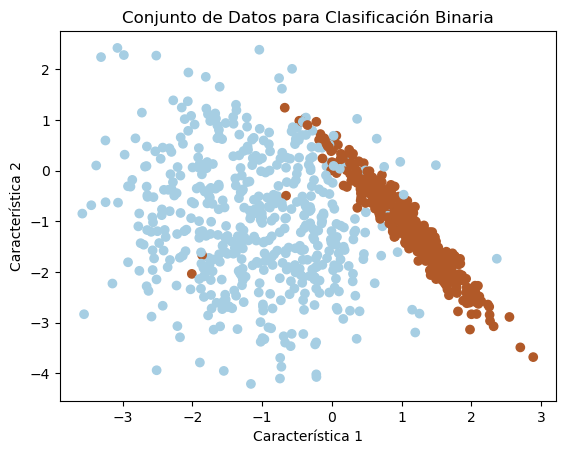

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Crear un conjunto de datos sintético para clasificación binaria
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=39)

# Visualizar el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Datos para Clasificación Binaria')
plt.show()
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature_1', 'Feature_2', 'Target'])
X_train, X_test, y_train, y_test = train_test_split(df[['Feature_1', 'Feature_2']], df['Target'], test_size=0.2, random_state=25)


In [2]:
df.head()

,Feature_1,Feature_2,Target
0,-0.619939,-1.518055,0.0
1,-0.523279,-1.531836,0.0
2,-1.314573,-2.033402,0.0
3,-1.672584,1.130544,0.0
4,-1.377478,-0.292098,0.0


## Creando la clase de Regresión Logistica

In [3]:
class LogisticRegressionAI():
    '''
    Regresion logistica desde 0
    Hiperparametros:
        Learning rate
        Epochs
    
    La funcion fit se encarga de ajustar los pesos W y B.
    La funcion predict se encarga de predecir las clases de acuerdo a los samples de entrada.
    La función binary_cross_entropy_loss calcula la función de costo.
    '''
    def __init__(self, lr=0.0001, epochs=1000):
        self.epochs = epochs
        self.lr = lr
        self.w = None
        self.b = None
    
    
    def sigmoid (self, x):
        return 1/(1+np.exp(-x))
    
    def binary_cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  # Pequeño valor para evitar problemas con el logaritmo de cero
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip para evitar valores extremos en el logaritmo ]0,1[
        loss = - (1 / len(y_true)) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        #w1*x1 + w2*x2 + ... + wn*xn + b
        self.w = np.random.rand((n_features))
        self.b = 0

        for epoch in range(self.epochs):
            linear_prediction = np.dot(X, self.w) + self.b
            #(800,)
            prob = self.sigmoid(linear_prediction)

            #(samples, features)
            #dw = (features, samples) . (samples) = (features)
            dw = 1/n_samples * np.dot(X.T, (prob - y))
            db = 1/n_samples * np.sum(prob - y)

            #Update parameters
            self.w = self.w - self.lr*dw
            self.b = self.b - self.lr*db
            error = self.binary_cross_entropy_loss(y, prob)
            if epoch % 200 == 0:
                print("Epoch {0} W {1}".format(epoch, str(self.w)))
                print("Epoch {0} B {1}".format(epoch, str(self.b)))
                print("Error {0} ".format(str(error)))
                print("******************************")

    def predict(self, X):
        linear_prediction = np.dot(X, self.w) + self.b
        prob = self.sigmoid(linear_prediction)
        class_pred = [0 if y<0.5 else 1 for y in prob]
        return class_pred
    
logisticFromScratch = LogisticRegressionAI(lr=0.001, epochs=6000)
logisticFromScratch.fit(X_train, y_train)
y_hat = logisticFromScratch.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_hat)
informe_clasificacion = classification_report(y_test, y_hat)

# Imprimir resultados
print(f'Accuracy del modelo: {accuracy:.2f}')
print('\nInforme de clasificación:')
print(informe_clasificacion)

Epoch 0 W [0.26769897 0.16319527]
Epoch 0 B 4.0206237695429536e-05
Error 0.5725959579137198 
******************************
Epoch 200 W [0.35039739 0.14853856]
Epoch 200 B 0.007510869449902227
Error 0.536997372590621 
******************************
Epoch 400 W [0.42647364 0.13703976]
Epoch 400 B 0.013957470754217258
Error 0.5071514186550615 
******************************
Epoch 600 W [0.49674509 0.12820814]
Epoch 600 B 0.019534343974804847
Error 0.4818852109670212 
******************************
Epoch 800 W [0.56192943 0.12161563]
Epoch 800 B 0.02437681079146142
Error 0.46028199968680306 
******************************
Epoch 1000 W [0.62264625 0.11689812]
Epoch 1000 B 0.028600710691013474
Error 0.44163025385505605 
******************************
Epoch 1200 W [0.67942582 0.11375039]
Epoch 1200 B 0.032303778495887676
Error 0.4253777788416977 
******************************
Epoch 1400 W [0.73272057 0.11191849]
Epoch 1400 B 0.035567800114633334
Error 0.4110942268631471 
*******************

## Aplicando regresión logistica con scikit learn.

In [4]:
# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
modelo_logistico.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
informe_clasificacion = classification_report(y_test, y_pred)

# Imprimir resultados
print(f'Accuracy del modelo: {accuracy:.2f}')
print('\nInforme de clasificación:')
print(informe_clasificacion)

Accuracy del modelo: 0.96

Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        95
         1.0       0.95      0.98      0.97       105

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [5]:

import tensorflow as tf
# Define the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create a callback to track the loss values
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}, Loss: {logs['loss']}, Accuracy: {logs['accuracy']}")

# Fit the model with the LossHistory callback
history_callback = LossHistory()
model.fit(X_train, y_train, epochs=200, batch_size=32, callbacks=[history_callback])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy del modelo: {accuracy:.2f}')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")
informe_clasificacion = classification_report(y_test, y_pred)
print('\nInforme de clasificación:')
print(informe_clasificacion)

Epoch 1/200
25/25 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6625
Epoch 2/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5949 - accuracy: 0.6725
Epoch 3/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.6875
Epoch 4/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7013
Epoch 5/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7200
Epoch 6/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7362
Epoch 7/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7513
Epoch 8/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5128 - accuracy: 0.7625
Epoch 9/200
25/25 [==============================] - 0s 1ms/step - loss: 0.5020 - accuracy: 0.7700
Epoch 10/200
25/25 [==============================] - 0s 1ms/step - loss: 0.4918 - accuracy: 0.7825
Epoch 11/